<a href="https://colab.research.google.com/github/Alton1998/University-Notes/blob/main/Analysis_of_Mean_and_Gaussian_filter_Frequencies-v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


In [29]:
!pip install mayavi

In [30]:
!pip install PyQt5

# Defining the Mean Filter and the Gaussian Filter

In [31]:
AM_FILTER_5 = np.ones((5,5))/25

In [32]:
AM_FILTER_5

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [33]:
gaussian_filter = [[1,4,7,4,1],
                   [4,16,26,16,4],
                   [7,26,41,26,7],
                   [4,16,26,16,4],
                   [1,4,7,4,1]
                   ]

In [34]:
gaussian_filter = np.array(gaussian_filter)/273

In [35]:
gaussian_filter

array([[0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ],
       [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
       [0.02564103, 0.0952381 , 0.15018315, 0.0952381 , 0.02564103],
       [0.01465201, 0.05860806, 0.0952381 , 0.05860806, 0.01465201],
       [0.003663  , 0.01465201, 0.02564103, 0.01465201, 0.003663  ]])

# Fourier Analysis of the Arithmetic mean filter and the Gaussian Filter (Before Zero Padding)

In [36]:
fft_am = scipy.fft.fft2(AM_FILTER_5)

In [37]:
fft_am

array([[ 1.00000000e+00-0.j,  6.93889390e-17+0.j,  3.46944695e-17+0.j,
         3.46944695e-17-0.j,  6.93889390e-17-0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00-0.j,  0.00000000e+00-0.j],
       [-2.77555756e-17+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00-0.j,  0.00000000e+00-0.j],
       [-2.77555756e-17-0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00-0.j,  0.00000000e+00-0.j],
       [ 0.00000000e+00-0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00-0.j,  0.00000000e+00-0.j]])

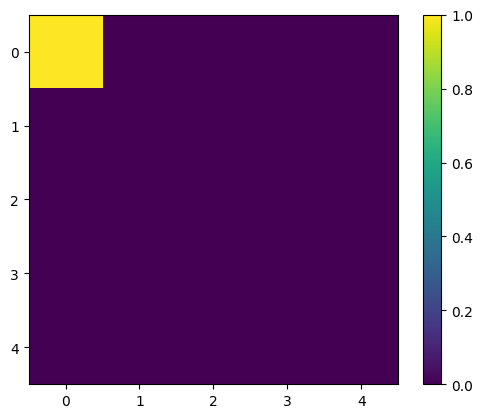

In [38]:
plt.imshow(np.abs(fft_am))
plt.colorbar()

In [39]:
fft_gauss = scipy.fft.fft2(gaussian_filter)

In [40]:
fft_gauss

array([[ 1.00000000e+00-0.00000000e+00j, -3.56452489e-01-2.58977892e-01j,
         1.21301447e-02+3.73327465e-02j,  1.21301447e-02-3.73327465e-02j,
        -3.56452489e-01+2.58977892e-01j],
       [-3.56452489e-01-2.58977892e-01j,  5.79715675e-02+1.78418139e-01j,
         3.39579115e-03-1.04511705e-02j, -8.89029664e-03+6.45917860e-03j,
         1.87599933e-01+1.38777878e-17j],
       [ 1.21301447e-02+3.73327465e-02j,  3.39579115e-03-1.04511705e-02j,
         6.36491131e-04-4.62437875e-04j, -7.86746305e-04+3.14418630e-18j,
        -8.89029664e-03-6.45917860e-03j],
       [ 1.21301447e-02-3.73327465e-02j, -8.89029664e-03+6.45917860e-03j,
        -7.86746305e-04-3.14418630e-18j,  6.36491131e-04+4.62437875e-04j,
         3.39579115e-03+1.04511705e-02j],
       [-3.56452489e-01+2.58977892e-01j,  1.87599933e-01-1.38777878e-17j,
        -8.89029664e-03-6.45917860e-03j,  3.39579115e-03+1.04511705e-02j,
         5.79715675e-02-1.78418139e-01j]])

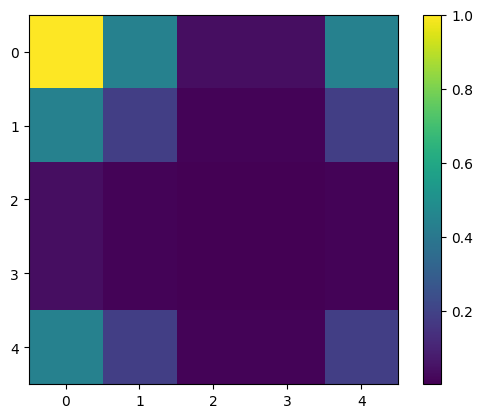

In [41]:
plt.imshow(np.abs(fft_gauss))
plt.colorbar()

# Fourier Analysis of the Arithmetic mean filter and the Gaussian Filter (After Zero Padding)

In [42]:
AM_FILTER_5_padded = np.pad(AM_FILTER_5, ((10,10),(10,10)), 'constant')

In [43]:
AM_FILTER_5_padded.shape

(25, 25)

In [44]:
gauss_filter_padded = np.pad(gaussian_filter,((10,10),(10,10)),"constant")

In [45]:
gauss_filter_padded.shape

(25, 25)

In [46]:
fft_am_padded = scipy.fft.fft2(AM_FILTER_5_padded)

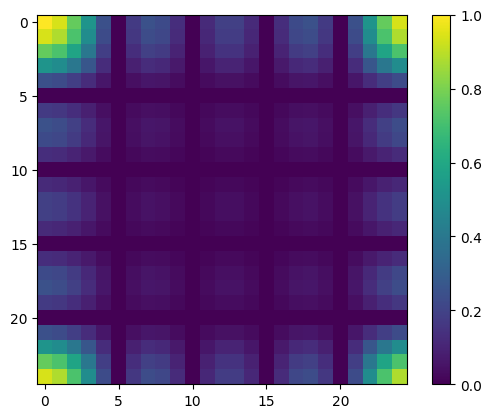

In [47]:
plt.imshow(np.abs(fft_am_padded))
plt.colorbar()

In [48]:
fft_gauss_padded = scipy.fft.fft2(gauss_filter_padded)

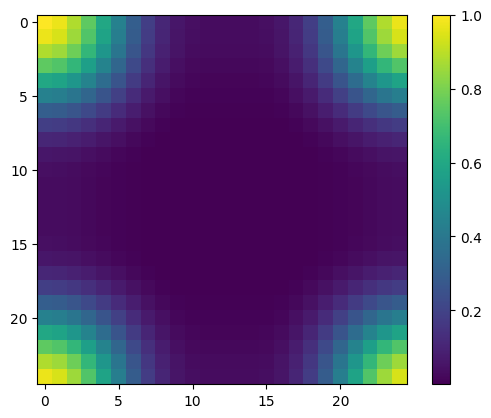

In [49]:
plt.imshow(np.abs(fft_gauss_padded))
plt.colorbar()

In [50]:
from mpl_toolkits.mplot3d import Axes3D

In [58]:
import plotly.graph_objects as go
z = np.abs(fft_am_padded)
sh_0, sh_1 = z.shape
x, y = np.array(list(range(0,25))), np.array(list(range(0,25)))
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='AM Padded Frequency', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [59]:
z = np.abs(fft_gauss_padded)
sh_0, sh_1 = z.shape
x, y = np.array(list(range(0,25))), np.array(list(range(0,25)))
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Gauss Padded Frequency', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [56]:
z.shape

(25, 25)